<a href="https://colab.research.google.com/github/AbhhishekY/LeetCode_answers/blob/master/Q2_Twitter_sentimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import matplotlib.pyplot as plt

In [56]:
class TwitterClient(object): 
    
    def __init__(self): 
        
        # keys and tokens from the Twitter Dev Console 
        consumer_key = 'zPgTzGc0MPAVdPaiTWL2PEGft'
        consumer_secret = 'Hnv7lYFaCaphcF77nSqrPlaatnBGjfqYcOXbHbrnzmN9u4bcdp'
        access_token = '496987160-17Aqj1qSq3zqR5BQkEipS6iNmhJ0SS22qZqtYrJA'
        access_token_secret = '6L9wjrTUgBtamKRnQlMQAPJlr8nEY21qDQdLWOZq4ZT84'
  
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 
  
    def clean_tweet(self, tweet): 
        #clean the tweets 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) || (\w+:\/\/\S+)", " ", tweet).split())
  
    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
  
    def get_tweets(self, query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count) 
  
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 

In [57]:
def main(x): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    # calling function to get tweets
    print("Tweets from the news channel "+x)
    tweets = api.get_tweets(query = x, count = 200) 
  
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets 
    
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets 
    neg = 100*len(ntweets)/len(tweets)
    pos = 100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)

    print("positive  tweets percentage: {} % \n ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = ['positive' , 'negative']
    y = [neg , pos]
    ax.bar(x,y)
    plt.show()




 

Tweets from the news channel trump
Negative tweets percentage: 30.76923076923077 %
positive  tweets percentage: 69.23076923076923 % 
 


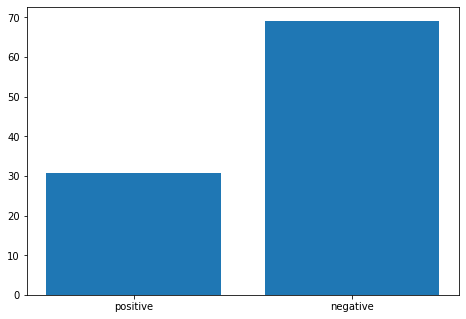

Tweets from the news channel NDTV
Negative tweets percentage: 36.61971830985915 %
positive  tweets percentage: 63.38028169014085 % 
 


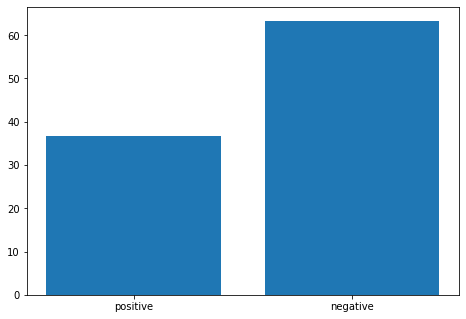

Tweets from the news channel times now
Negative tweets percentage: 45.833333333333336 %
positive  tweets percentage: 54.166666666666664 % 
 


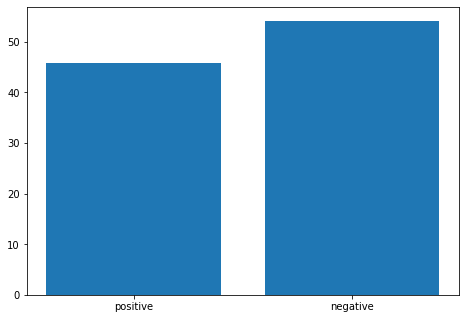

In [58]:
main('trump')
main('NDTV')
main('times now')


